In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import mstats


In [2]:
df = pd.read_csv(r'C:\Users\teble\telecom-analysis\notebooks\Copy of Week2_challenge_data_source(CSV).csv')

In [4]:
# Aggregate data using 'IMSI' as the user identifier
user_sessions = df.groupby('IMSI')['MSISDN/Number'].count().rename('xDR_sessions')  # Using 'MSISDN/Number' as session ID
user_duration = df.groupby('IMSI')['Dur. (ms)'].sum().rename('total_session_duration')  # 'Dur. (ms)' as session duration
user_dl = df.groupby('IMSI')['Total DL (Bytes)'].sum().rename('total_download_data')  # 'Total DL (Bytes)' for DL data
user_ul = df.groupby('IMSI')['Total UL (Bytes)'].sum().rename('total_upload_data')  # 'Total UL (Bytes)' for UL data
user_data_volume = (user_dl + user_ul).rename('total_data_volume')

# Combine aggregated data
user_data = pd.concat([user_sessions, user_duration, user_dl, user_ul, user_data_volume], axis=1)

# Save the aggregated data to a CSV
user_data.to_csv('aggregated_user_data.csv')



In [5]:
user_data = pd.read_csv('aggregated_user_data.csv')


In [6]:
user_data.fillna(user_data.mean(), inplace=True)


In [7]:
user_data['duration_decile'] = pd.qcut(user_data['total_session_duration'], 10, labels=False)
decile_data = user_data.groupby('duration_decile')['total_data_volume'].sum()
decile_data


duration_decile
0    5.457884e+12
1    6.105181e+12
2    6.554138e+12
3    6.177730e+12
4    5.070381e+12
5    6.452409e+12
6    6.176211e+12
7    7.843097e+12
8    9.330793e+12
9    1.491535e+13
Name: total_data_volume, dtype: float64

In [8]:
user_data.describe()


,IMSI,xDR_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume,duration_decile
count,1.072650e+05,107265.000000,1.072650e+05,1.072650e+05,1.072650e+05,1.072650e+05,107265.000000
mean,2.082016e+14,1.388477,1.459355e+05,6.333706e+08,5.728499e+07,6.906556e+08,4.484771
std,2.534986e+10,0.809069,1.863518e+05,4.643722e+08,3.564266e+07,4.908637e+08,2.877560
min,2.040471e+14,0.000000,7.142000e+03,8.827082e+06,2.866892e+06,3.324901e+07,0.000000
25%,2.082010e+14,1.000000,7.041100e+04,3.148031e+08,3.639251e+07,3.584885e+08,2.000000
50%,2.082015e+14,1.000000,1.024500e+05,5.700628e+08,4.678050e+07,6.176283e+08,4.000000
75%,2.082018e+14,2.000000,1.727990e+05,8.070673e+08,6.565842e+07,8.571685e+08,7.000000
max,2.140743e+14,18.000000,1.855375e+07,8.156743e+09,7.295774e+08,8.846226e+09,9.000000


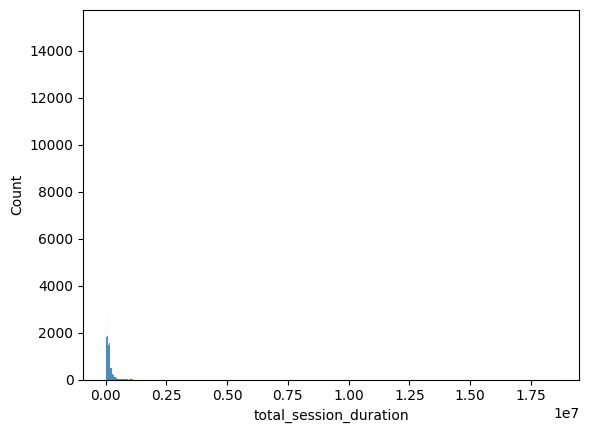

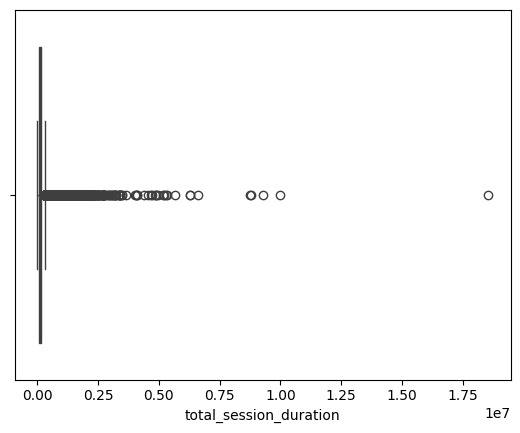

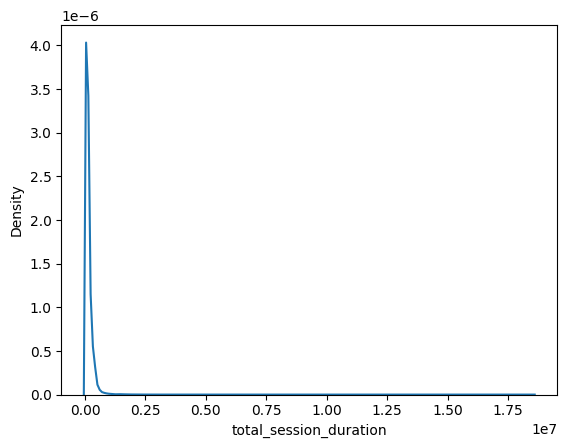

In [9]:
sns.histplot(user_data['total_session_duration'])
plt.show()

sns.boxplot(x=user_data['total_session_duration'])
plt.show()

sns.kdeplot(user_data['total_session_duration'])
plt.show()


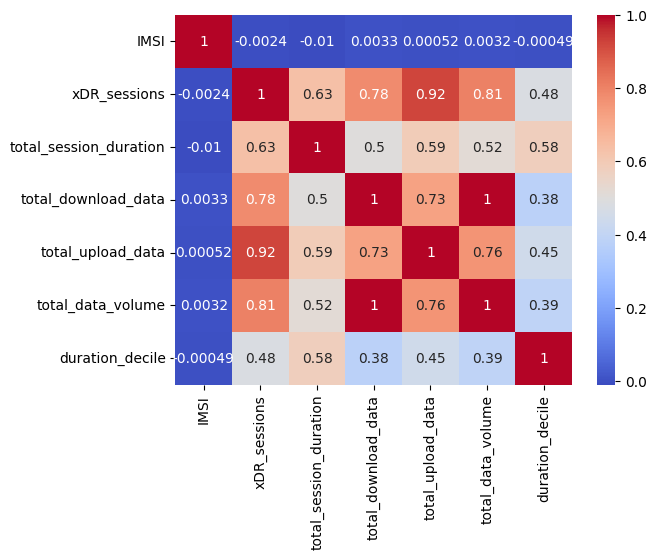

In [10]:
correlation_matrix = user_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_data.select_dtypes(include=['float64', 'int64']))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)


[0.60526628 0.14295056]


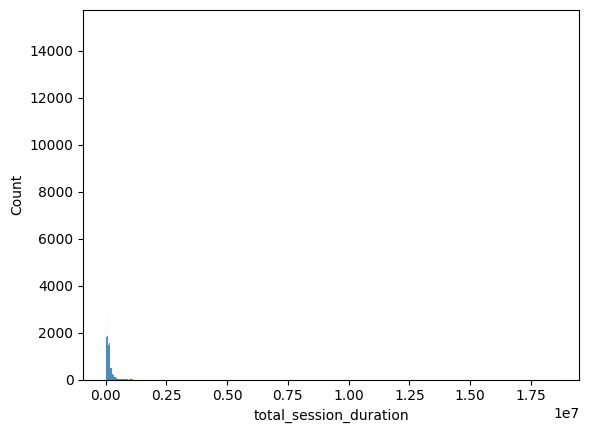

In [12]:
# Example plot
sns.histplot(user_data['total_session_duration'])
plt.show()